### Classify the students based on EEG information. If target label is 0 then student is confident else he/she is confused.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("EEG_data_classification_task.csv")

In [3]:
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0


In [4]:
df.shape

(12811, 12)

In [5]:
#change the name of target column
df.rename(columns = {'user-definedlabeln':'target label'}, inplace=True)

In [6]:
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,target label
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0


In [7]:
df.describe()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,target label
count,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000
mean,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.512606
std,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499861
min,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000
25%,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000
50%,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,1.000000
75%,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000
max,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000


In [8]:
df['target label'].value_counts() #distribution of data across target variable

1    6567
0    6244
Name: target label, dtype: int64

In [9]:
df.isnull().sum()

Attention       0
Mediation       0
Raw             0
Delta           0
Theta           0
Alpha1          0
Alpha2          0
Beta1           0
Beta2           0
Gamma1          0
Gamma2          0
target label    0
dtype: int64

In [10]:
df.isnull().sum().sum() #check null values across all data

0

##distribution of numerical columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


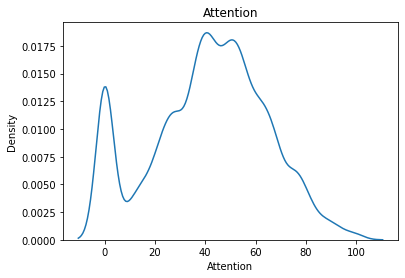

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


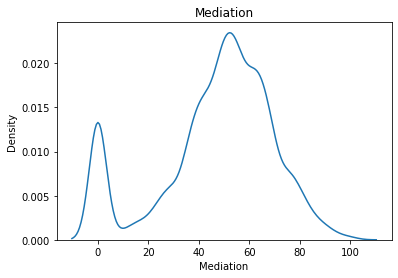

In [11]:
import seaborn as sns
for col in ['Attention', 'Mediation']:
  sns.distplot(df[col], hist=False)
  plt.title(col)
  plt.show()


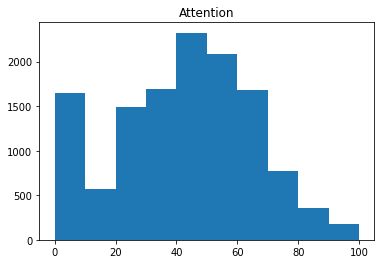

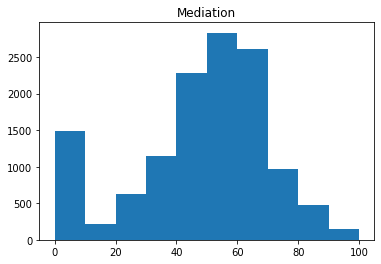

In [12]:
for col in ['Attention', 'Mediation']:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

In [13]:
df.corr()['target label'][:-1].sort_values(ascending=False)

Delta        0.148588
Theta        0.147558
Alpha1       0.121711
Beta1        0.111482
Alpha2       0.107238
Gamma2       0.053533
Beta2        0.019556
Gamma1       0.011316
Raw         -0.001465
Mediation   -0.023502
Attention   -0.119088
Name: target label, dtype: float64

In [14]:
print(df[df['Attention'] == 0].shape) 

(1423, 12)


In [15]:
print(df[df['Mediation'] == 0].shape)

(1423, 12)


## Feature selection

In [16]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [17]:
X.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target label, dtype: int64

In [19]:
Y.unique()

array([0, 1])

In [20]:
from sklearn.model_selection import train_test_split  # Split Training and Testing Data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,
                                                 random_state=7)

In [21]:
print(X_train.shape, X_test.shape)

(6405, 11) (6406, 11)


###Least Absolute Shrinkage and Selection Operator

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
lasso.fit(X_train, Y_train)
lasso.coef_

array([-2.47750062e-03,  1.38800878e-03, -1.05445442e-05,  6.63243269e-08,
        1.86122818e-07,  8.31141769e-08,  1.09732726e-07,  2.93370978e-07,
       -2.29919400e-07, -3.86432207e-07,  7.18625991e-07])

## data normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Applying Multiple Models using loop

In [24]:
def eval_model(Y_test,Y_predict):
  from sklearn.metrics import confusion_matrix,accuracy_score
  # Calculate Confusion Matrix
  cf_mat=confusion_matrix(Y_test,Y_predict)

  # Calculate Accuracy
  acc = accuracy_score(Y_test,Y_predict)
  return cf_mat, acc

In [25]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn.svm import SVC
NB_model_list = [GaussianNB(),ComplementNB(),BernoulliNB(),SVC()]
dict1={}
for model in NB_model_list:
  print(model.__class__)
  # train the model
  model.fit(X_train,Y_train)
  # test the model So give on known data (X_test)
  Y_predict = model.predict(X_test)
  cf_mat, acc = eval_model(Y_test,Y_predict)
  #Print Results
  
  temp = pd.DataFrame({'Not Confused' : cf_mat[0,:], 'Confused' : cf_mat[1,:]})
  print("Confusion Matrix \n",temp)
  print("Accuracy : ",acc)
  dict1[model.__class__]=acc

print("model with accuracy",dict1)

<class 'sklearn.naive_bayes.GaussianNB'>
Confusion Matrix 
    Not Confused  Confused
0          2691      2591
1           427       697
Accuracy :  0.528879175772713
<class 'sklearn.naive_bayes.ComplementNB'>
Confusion Matrix 
    Not Confused  Confused
0          2220      1855
1           898      1433
Accuracy :  0.5702466437714643
<class 'sklearn.naive_bayes.BernoulliNB'>
Confusion Matrix 
    Not Confused  Confused
0           388       317
1          2730      2971
Accuracy :  0.5243521698407743
<class 'sklearn.svm._classes.SVC'>
Confusion Matrix 
    Not Confused  Confused
0          2020      1405
1          1098      1883
Accuracy :  0.6092725569778333
model with accuracy {<class 'sklearn.naive_bayes.GaussianNB'>: 0.528879175772713, <class 'sklearn.naive_bayes.ComplementNB'>: 0.5702466437714643, <class 'sklearn.naive_bayes.BernoulliNB'>: 0.5243521698407743, <class 'sklearn.svm._classes.SVC'>: 0.6092725569778333}


##Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [27]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
Y_predict=model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate cf
cf_mat=confusion_matrix(Y_test,Y_predict)

# Calculate Accuracy
acc = accuracy_score(Y_test,Y_predict)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[1700 1418]
 [1418 1870]]
Accuracy :  0.5572900405869498


[Text(219.0034408771235, 214.24235294117648, 'Theta <= 0.066\ngini = 0.5\nsamples = 6405\nvalue = [3126, 3279]\nclass = class2'),
 Text(126.45516788229392, 207.8470588235294, 'Delta <= 0.137\ngini = 0.496\nsamples = 4482\nvalue = [2433, 2049]\nclass = class1'),
 Text(59.64039938208965, 201.45176470588234, 'Attention <= 0.39\ngini = 0.486\nsamples = 3174\nvalue = [1851, 1323]\nclass = class1'),
 Text(25.59531033630881, 195.0564705882353, 'Mediation <= 0.005\ngini = 0.5\nsamples = 980\nvalue = [498, 482]\nclass = class1'),
 Text(8.25912550897283, 188.66117647058823, 'Gamma2 <= 0.001\ngini = 0.461\nsamples = 250\nvalue = [160, 90]\nclass = class1'),
 Text(7.1014919244071635, 182.26588235294116, 'Raw <= 0.647\ngini = 0.049\nsamples = 40\nvalue = [39, 1]\nclass = class1'),
 Text(6.780066547347716, 175.87058823529412, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]\nclass = class1'),
 Text(7.422917301466611, 175.87058823529412, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = class2'),
 Text(9.4

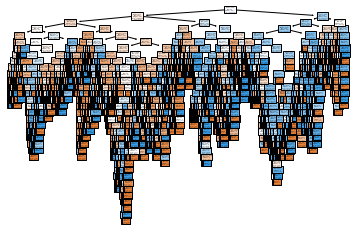

In [30]:
from sklearn import tree
fn = list(X.columns) # feature name
cn = ['class1', 'class2'] # category name
tree.plot_tree(model,feature_names = fn, 
               class_names=cn,
               filled = True)

In [31]:
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=fn)

In [32]:
print(tree_rules) #printing results

|--- Theta <= 0.07
|   |--- Delta <= 0.14
|   |   |--- Attention <= 0.39
|   |   |   |--- Mediation <= 0.00
|   |   |   |   |--- Gamma2 <= 0.00
|   |   |   |   |   |--- Raw <= 0.65
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Raw >  0.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Gamma2 >  0.00
|   |   |   |   |   |--- Gamma1 <= 0.06
|   |   |   |   |   |   |--- Alpha1 <= 0.03
|   |   |   |   |   |   |   |--- Gamma1 <= 0.01
|   |   |   |   |   |   |   |   |--- Alpha1 <= 0.00
|   |   |   |   |   |   |   |   |   |--- Delta <= 0.02
|   |   |   |   |   |   |   |   |   |   |--- Alpha2 <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Alpha2 >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- Delta >  0.02
|   |   |   |   |   |   |   |   |   |   |--- Alpha1 <= 0.00
|   |   |   |   |   |   |   |   |   |   | 

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
lr = LogisticRegression()

models = [lr, knn_clf, dt_clf, rf_clf]

for model1 in models:
  model1.fit(X_train, Y_train)
  pred = model1.predict(X_test)
  print(model1.__class__.__name__)
  print("score: ", accuracy_score(Y_test, pred))

LogisticRegression
score:  0.5925694661255073
KNeighborsClassifier
score:  0.584920387137059
DecisionTreeClassifier
score:  0.5546362784889166
RandomForestClassifier
score:  0.6429909459881361


## Random forest algorithm

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

model1 = ExtraTreesClassifier(n_estimators = 250, criterion = 'gini', min_samples_split = 2, max_features = None)
model1.fit(X_train, Y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [36]:
rfpred = model1.predict(X_test) #we have to predict rf as it has recieved high accuracy

In [37]:
print('Accuracy : ' + str(accuracy_score(Y_test, rfpred)))

Accuracy : 0.6422104277240087


In [38]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, rfpred)

In [39]:
temp = pd.DataFrame({'Not Confused':mat[0, :], 'Confused':mat[1,:]})
print(temp)

   Not Confused  Confused
0          2043      1217
1          1075      2071


In [40]:
from sklearn.model_selection import RandomizedSearchCV  #hyperparameter tuning of Random Forest

#number of trees in forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]

#max depth of tree
max_depth = [int(x) for x in np.linspace(5,30,6)]

#quality of split
criterion = ['gini','entropy']

#min no. of samples to consider for splitting a internal node
min_samples_split = [2,5,7,10]

#min number of node can be as leaf node
min_samples_leaf = [2,5,8]

# The number of features to consider when looking for the best split:
max_features = ["auto","sqrt"]

random_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                   max_features=max_features)
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [2, 5, 8], 'max_features': ['auto', 'sqrt']}


In [41]:
rfclf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rfclf, param_distributions=random_grid, cv=5, n_iter=10,random_state=42, n_jobs=-1,verbose=1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
print(rf_random.best_score_)

0.6546448087431693


In [43]:
print(rf_random.best_params_)

{'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}


## AdaBoost Classifier

In [44]:
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [45]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model1 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model1, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.565215479813572


In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
model =AdaBoostClassifier(n_estimators=10, base_estimator=svc,learning_rate=1)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())